<a href="https://colab.research.google.com/github/nhamhung/Coder-School-Machine-Learning/blob/master/Lab00_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors

## Project WISH - Fashion Recommendation

WISH (https://github.com/codingbunnie/WISH-by-NANA-FashionRecommendationEngine) is the final project of Nana, Demo Day winner of the Machine Learning Class Mariana at CoderSchool. 

WISH is a machine-learning powered fashion recommendation engine which allow users to input any JPG or JPEG photo of clothing items and receive recommendations for visually similar items (and where to buy them). It works using Object Detection with YOLO V3, Feature Extraction with Inception V3 in conjunction with **K-Nearest Neighbor**. We will explore the easy-to-implement but pretty useful part the the project, KNN.

## Helper functions

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns=
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("ticks")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Download the data

In [ ]:
# Model and feature vectors
!mkdir temp/
!wget -q --show-progress https://intro-to-ml-minhdh.s3-ap-southeast-1.amazonaws.com/FTMLE/topFV.pkl -P ./temp/
!wget -q --show-progress https://intro-to-ml-minhdh.s3-ap-southeast-1.amazonaws.com/FTMLE/top.csv -P ./temp/
!wget -q --show-progress https://intro-to-ml-minhdh.s3-ap-southeast-1.amazonaws.com/FTMLE/dressFV.pkl -P ./temp/
!wget -q --show-progress https://intro-to-ml-minhdh.s3-ap-southeast-1.amazonaws.com/FTMLE/dress.csv -P ./temp/
!wget -q --show-progress https://intro-to-ml-minhdh.s3-ap-southeast-1.amazonaws.com/FTMLE/extractModel.h5 -P ./temp/
# Testing images
!wget -q --show-progress https://intro-to-ml-minhdh.s3-ap-southeast-1.amazonaws.com/FTMLE/testing_dress_1.jpg -P ./temp/
!wget -q --show-progress https://intro-to-ml-minhdh.s3-ap-southeast-1.amazonaws.com/FTMLE/testing_dress_2.jpg -P ./temp/
!wget -q --show-progress https://intro-to-ml-minhdh.s3-ap-southeast-1.amazonaws.com/FTMLE/testing_top_1.jpg -P ./temp/
!wget -q --show-progress https://intro-to-ml-minhdh.s3-ap-southeast-1.amazonaws.com/FTMLE/testing_top_2.jpg -P ./temp/

topFV.pkl           100%[===================>]  25.65M  7.71MB/s    in 3.3s    
top.csv             100%[===================>] 770.25K   698KB/s    in 1.1s    
dressFV.pkl         100%[===================>]   5.48M  3.10MB/s    in 1.8s    
dress.csv           100%[===================>] 169.02K   255KB/s    in 0.7s    
extractModel.h5     100%[===================>]  83.64M  13.4MB/s    in 7.8s    
testing_dress_1.jpg 100%[===================>] 570.88K   516KB/s    in 1.1s    
testing_dress_2.jpg 100%[===================>] 129.26K   193KB/s    in 0.7s    
testing_top_1.jpg   100%[===================>] 633.13K   571KB/s    in 1.1s    
testing_top_2.jpg   100%[===================>] 835.86K   761KB/s    in 1.1s    


### Load the model and extracted feature vectors

In [ ]:
import tensorflow as tf
from skimage.io import imread

extract_model = tf.keras.models.load_model('./temp/extractModel.h5')

def extract_feature_vector(image_path):
    '''This function reads an image in, then preprocesses in a few steps:
        - resize the image to (299, 299)
        - normalize pixel value to (0, 1) 
       and then return the feature vector with the shape (1, 2048)
       which is generated by the model extract_model
    '''
    image = imread(image_path)
    image = tf.image.resize(image, [299, 299])
    image = image[:,:,:3]
    image = tf.expand_dims(image, 0)
    image = image/255.0

    features = extract_model.predict(image)
    print('Shape of the feature vector', features.shape)
    return features

In [ ]:
import pickle

# The products feature vectors is stored in .pkl files
def load_feature_vectors(file_path):
    with open(file_path,'rb') as f:
        featureVector = pickle.load(f)
    return np.squeeze(featureVector)

top_product = load_feature_vectors('./temp/topFV.pkl')
dress_product = load_feature_vectors('./temp/dressFV.pkl')
products = np.concatenate((top_product, dress_product), axis=0)

print('#Products of tops:', top_product.shape)
print('#Products of dresses:', dress_product.shape)
print('#Products:', products.shape)

#Products of tops: (3283, 2048)
#Products of dresses: (702, 2048)
#Products: (3985, 2048)


### Display products

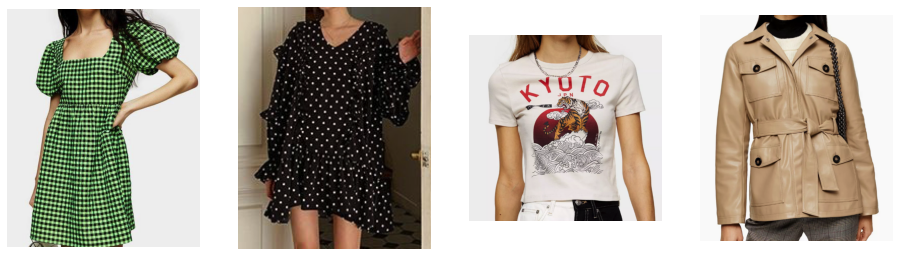

In [ ]:
from skimage import io

def display_images(image_urls):
    '''Display the images give a list of image URLs, each row contains 5 images
    '''
    plt.figure(figsize=(20, 15))
    columns = 5
    for i, image_url in enumerate(image_urls):
        ax = plt.subplot(len(image_urls) / columns + 1, columns, i + 1)
        image = io.imread(image_url)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# display_images(['https://images.topshop.com/i/TopShop/TS04I02RWHT_F_1.jpg'])
display_images(['./temp/testing_dress_1.jpg', './temp/testing_dress_2.jpg', './temp/testing_top_1.jpg', './temp/testing_top_2.jpg'])
plt.show()

### Finding k-nearest neighbors

[sklearn.neighbors.NearestNeighbors](https://scikit-learn.org/stable/modules/neighbors.html) provides functionality for finding $k$ training samples that are closest in distance to the new point. Here below is an example:

In [ ]:
from sklearn.neighbors import NearestNeighbors

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=3).fit(X)
distances, indices = nbrs.kneighbors([[0, 0]])
distances, indices

(array([[1.41421356, 1.41421356, 2.23606798]]), array([[0, 3, 1]]))

## Your turn

Let's build a image-based recommendation system using the helper funnctions above.

In [ ]:
top = pd.read_csv('./temp/top.csv')
dress = pd.read_csv('./temp/dress.csv')
top.sample(5)

,name,price,category,hrefs,imageURL,brand
2540,Striped Short-Sleeve Top,$455,top,https://farfetch.com/vn/shopping/women/moncler...,cdn-images.farfetch-contents.com/12/87/96/97/1...,Farfetch
219,Black Velvet Embellished Top,£65.00,top,https://www.topshop.com/en/tsuk/product/clothi...,images.topshop.com/i/TopShop/TS13R23RBLK_F_1.j...,Topshop
1233,Solid Color Loose Fit T-Shirt,$22.00 USD,top,https://en.stylenanda.comhttps://en.stylenanda...,en.stylenanda.com/web/product/extra/small/2020...,Stylenanda
2892,Long Sleeve Vega Floral Print Blouse,$254,top,https://farfetch.com/vn/shopping/women/isabel-...,cdn-images.farfetch-contents.com/14/74/14/85/1...,Farfetch
1998,Floral Lace Round-Necked Top,$40.00 USD,top,https://en.stylenanda.comhttps://en.stylenanda...,en.stylenanda.com/web/product/extra/small/2019...,Stylenanda


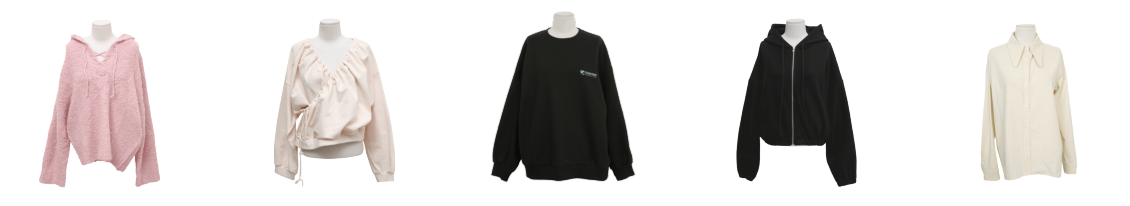

In [ ]:
urls = 'https://' + top.sample(5)['imageURL'].values
display_images(urls)

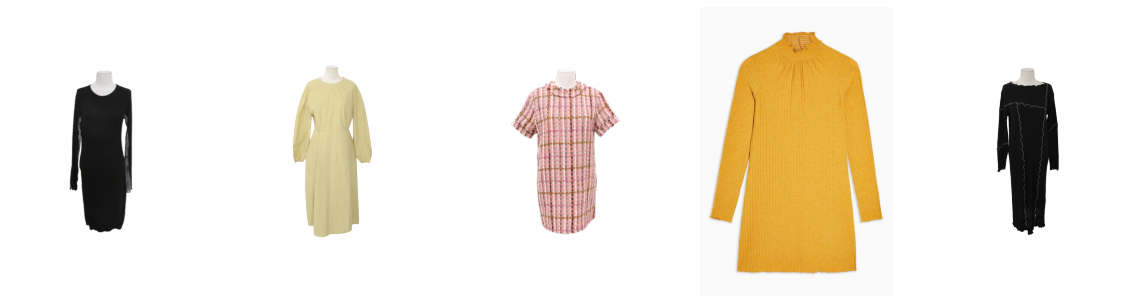

In [ ]:
urls = 'https://' + dress.sample(5)['imageURL'].values
display_images(urls)

Shape of the feature vector (1, 2048)


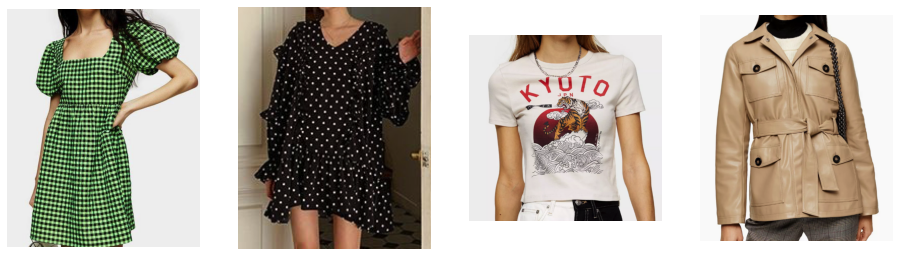

In [ ]:
# Pick one testing image
# Extract 2048 features of the testing image using extract_feature_vector()
testing_images = ['./temp/testing_dress_1.jpg', './temp/testing_dress_2.jpg', './temp/testing_top_1.jpg', './temp/testing_top_2.jpg']

image = testing_images[0]
image_features = extract_feature_vector(image)

display_images(testing_images)
plt.show()

In [ ]:
# Fit the product feature vectors in NearestNeighbors (with K = 5)
products_nn = NearestNeighbors(n_neighbors=5).fit(products)

In [ ]:
# Find the indices of 5 most similar products with the testing image
distances, indices = products_nn.kneighbors(image_features)

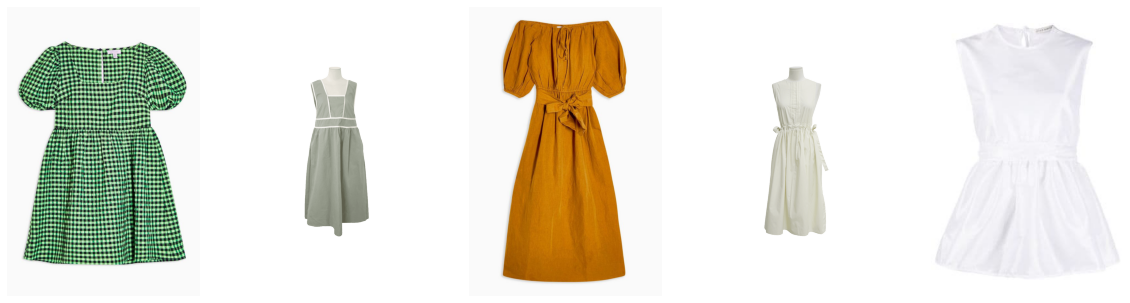

In [ ]:
# Find the imageURL of the top 5 similar products and display
products_csv = pd.concat([top, dress])
urls = 'http://' + products_csv.iloc[indices[0]]['imageURL'].values
display_images(urls)
plt.show()

In [ ]:
# Put everything in a function
def recommend(image_path):
    image_features = extract_feature_vector(image_path)
    distances, indices = products_nn.kneighbors(image_features)
    urls = 'http://' + products_csv.iloc[indices[0]]['imageURL'].values
    display_images(urls)
    plt.show()

Shape of the feature vector (1, 2048)


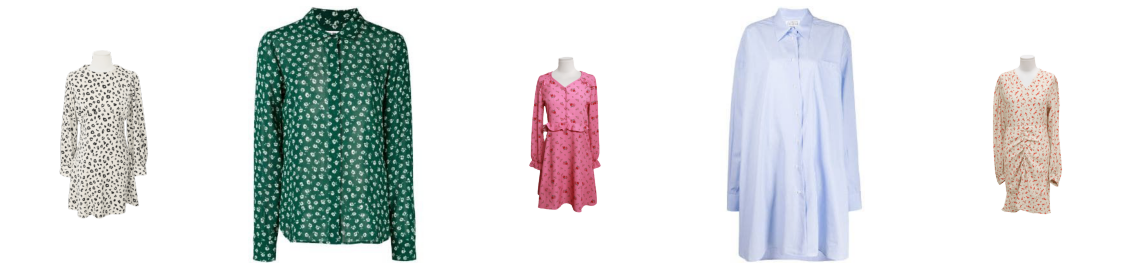

In [ ]:
recommend(testing_images[1])

Shape of the feature vector (1, 2048)


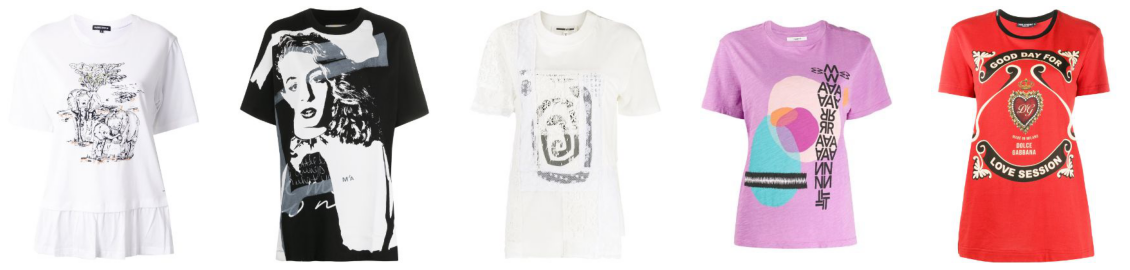

In [ ]:
recommend(testing_images[2])

Shape of the feature vector (1, 2048)


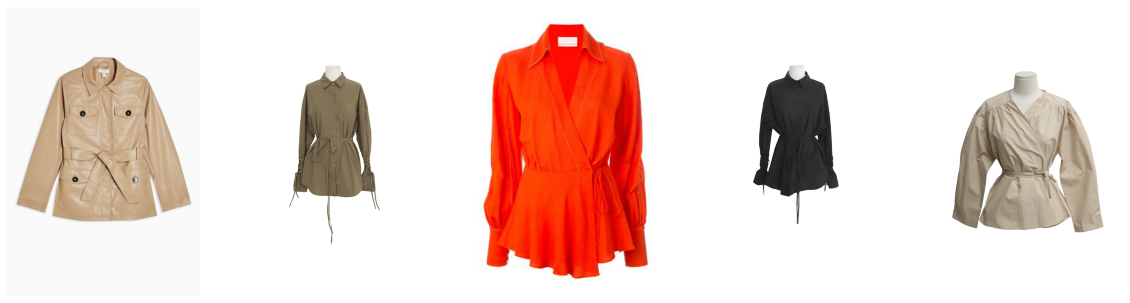

In [ ]:
recommend(testing_images[3])